In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
# Import the Data

data = pd.read_csv("C:/Users/ronit/OneDrive/Ronit/Machine Learning/Projects/EDA/My Project. Global Temps/Data/GlobalLandTemperaturesByCountry.csv")

In [3]:
# View the data

data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
# Converting the date column 'dt' from str to date format
 
data['dt'] = pd.to_datetime(data['dt'], format='%Y-%d-%m')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [7]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [8]:
# Missing Values

data.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

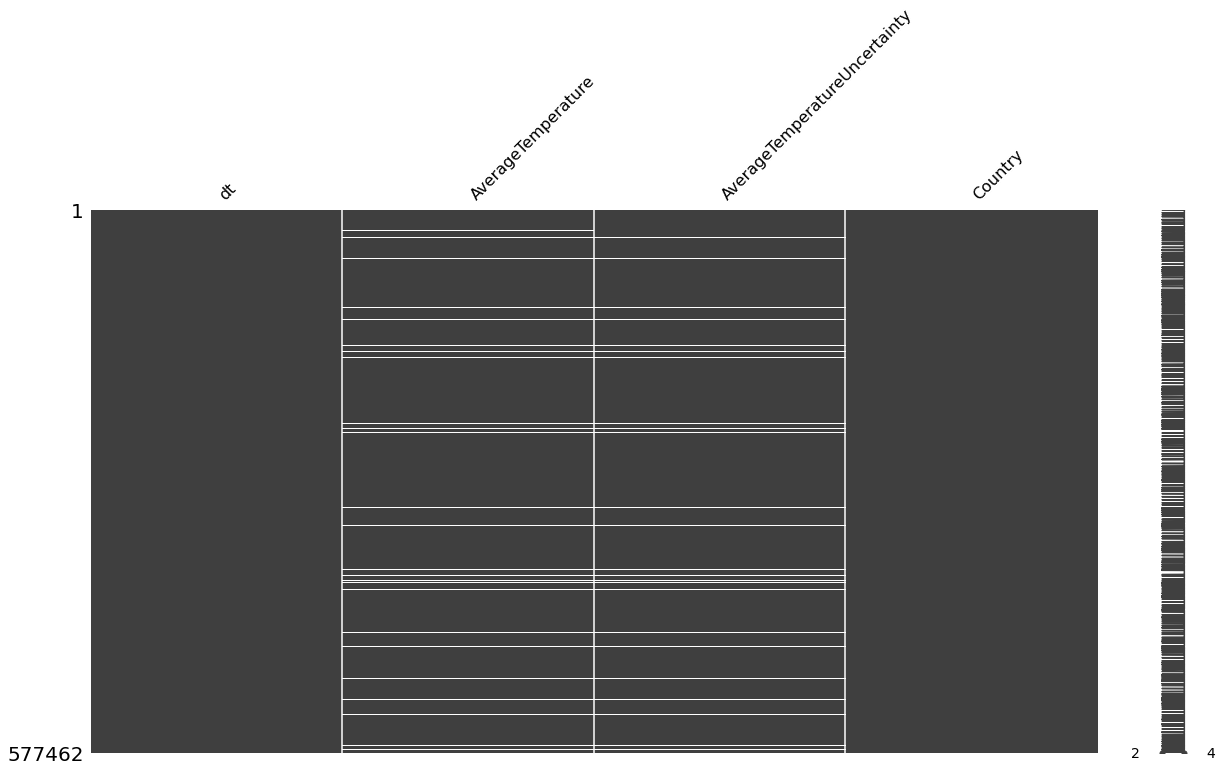

In [9]:
# Visualizing the missing data

missingno.matrix(data, figsize = (20,10))

In [28]:
# Handling Missing Data
# Filling the Missing Values with Forward Fill

data['AverageTemperature'] = data['AverageTemperature'].fillna(method='ffill')
data['AverageTemperatureUncertainty'] = data['AverageTemperatureUncertainty'].fillna(method='ffill')
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

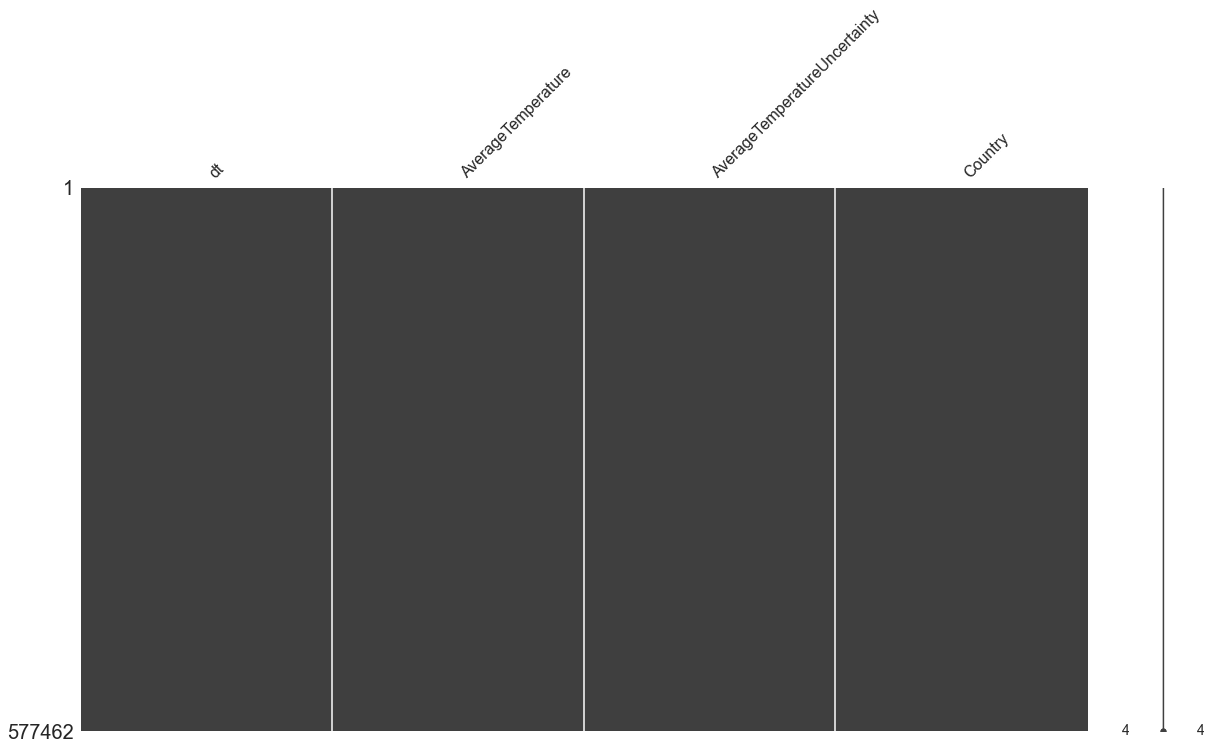

In [74]:
# Visualizing the missing data again

missingno.matrix(data, figsize = (20,10))

Text(0.5, 0, 'Global Average Temperature')

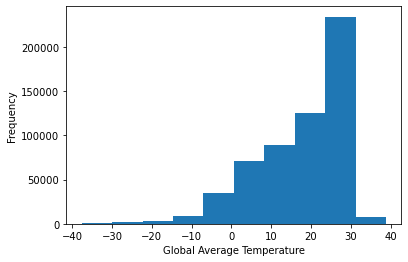

In [11]:
# Plotting Histogram of Average Temperature Values

data.AverageTemperature.plot.hist()
plt.xlabel('Global Average Temperature')

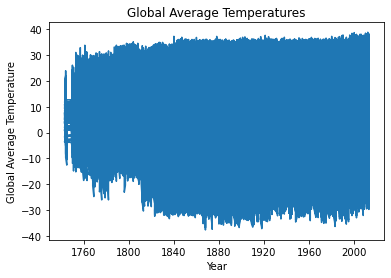

In [12]:
# Plotting a Scatter plot of Average Temperature Values

plt.plot(data["dt"], data["AverageTemperature"])
plt.title('Global Average Temperatures')
plt.xlabel('Year')
plt.ylabel('Global Average Temperature')
plt.show()

# The above lineplot is difficult to interpret, lets use a smaller segment shall we?

In [73]:
# Subsetting the year 1800

year1800 = data[(data["dt"] > "1800-01-01") & (data["dt"] < "1800-01-12")]
year1800

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
675,1800-01-02,-4.887,6.100,Åland
676,1800-01-03,-6.784,4.519,Åland
677,1800-01-04,3.487,2.092,Åland
678,1800-01-05,7.045,1.747,Åland
679,1800-01-06,9.580,1.639,Åland
...,...,...,...,...
569320,1800-01-07,27.641,1.736,Western Sahara
569321,1800-01-08,28.299,2.292,Western Sahara
569322,1800-01-09,25.847,2.400,Western Sahara
569323,1800-01-10,24.973,1.981,Western Sahara


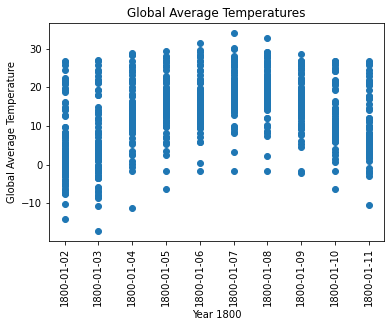

In [14]:
# Plotting a Scatter plot of Average Temperature Values against Months in the Year 1800

plt.scatter(year1800["dt"], year1800["AverageTemperature"])
plt.title('Global Average Temperatures')
plt.xlabel('Year 1800')
plt.xticks(rotation = 90)
plt.ylabel('Global Average Temperature')
plt.show()

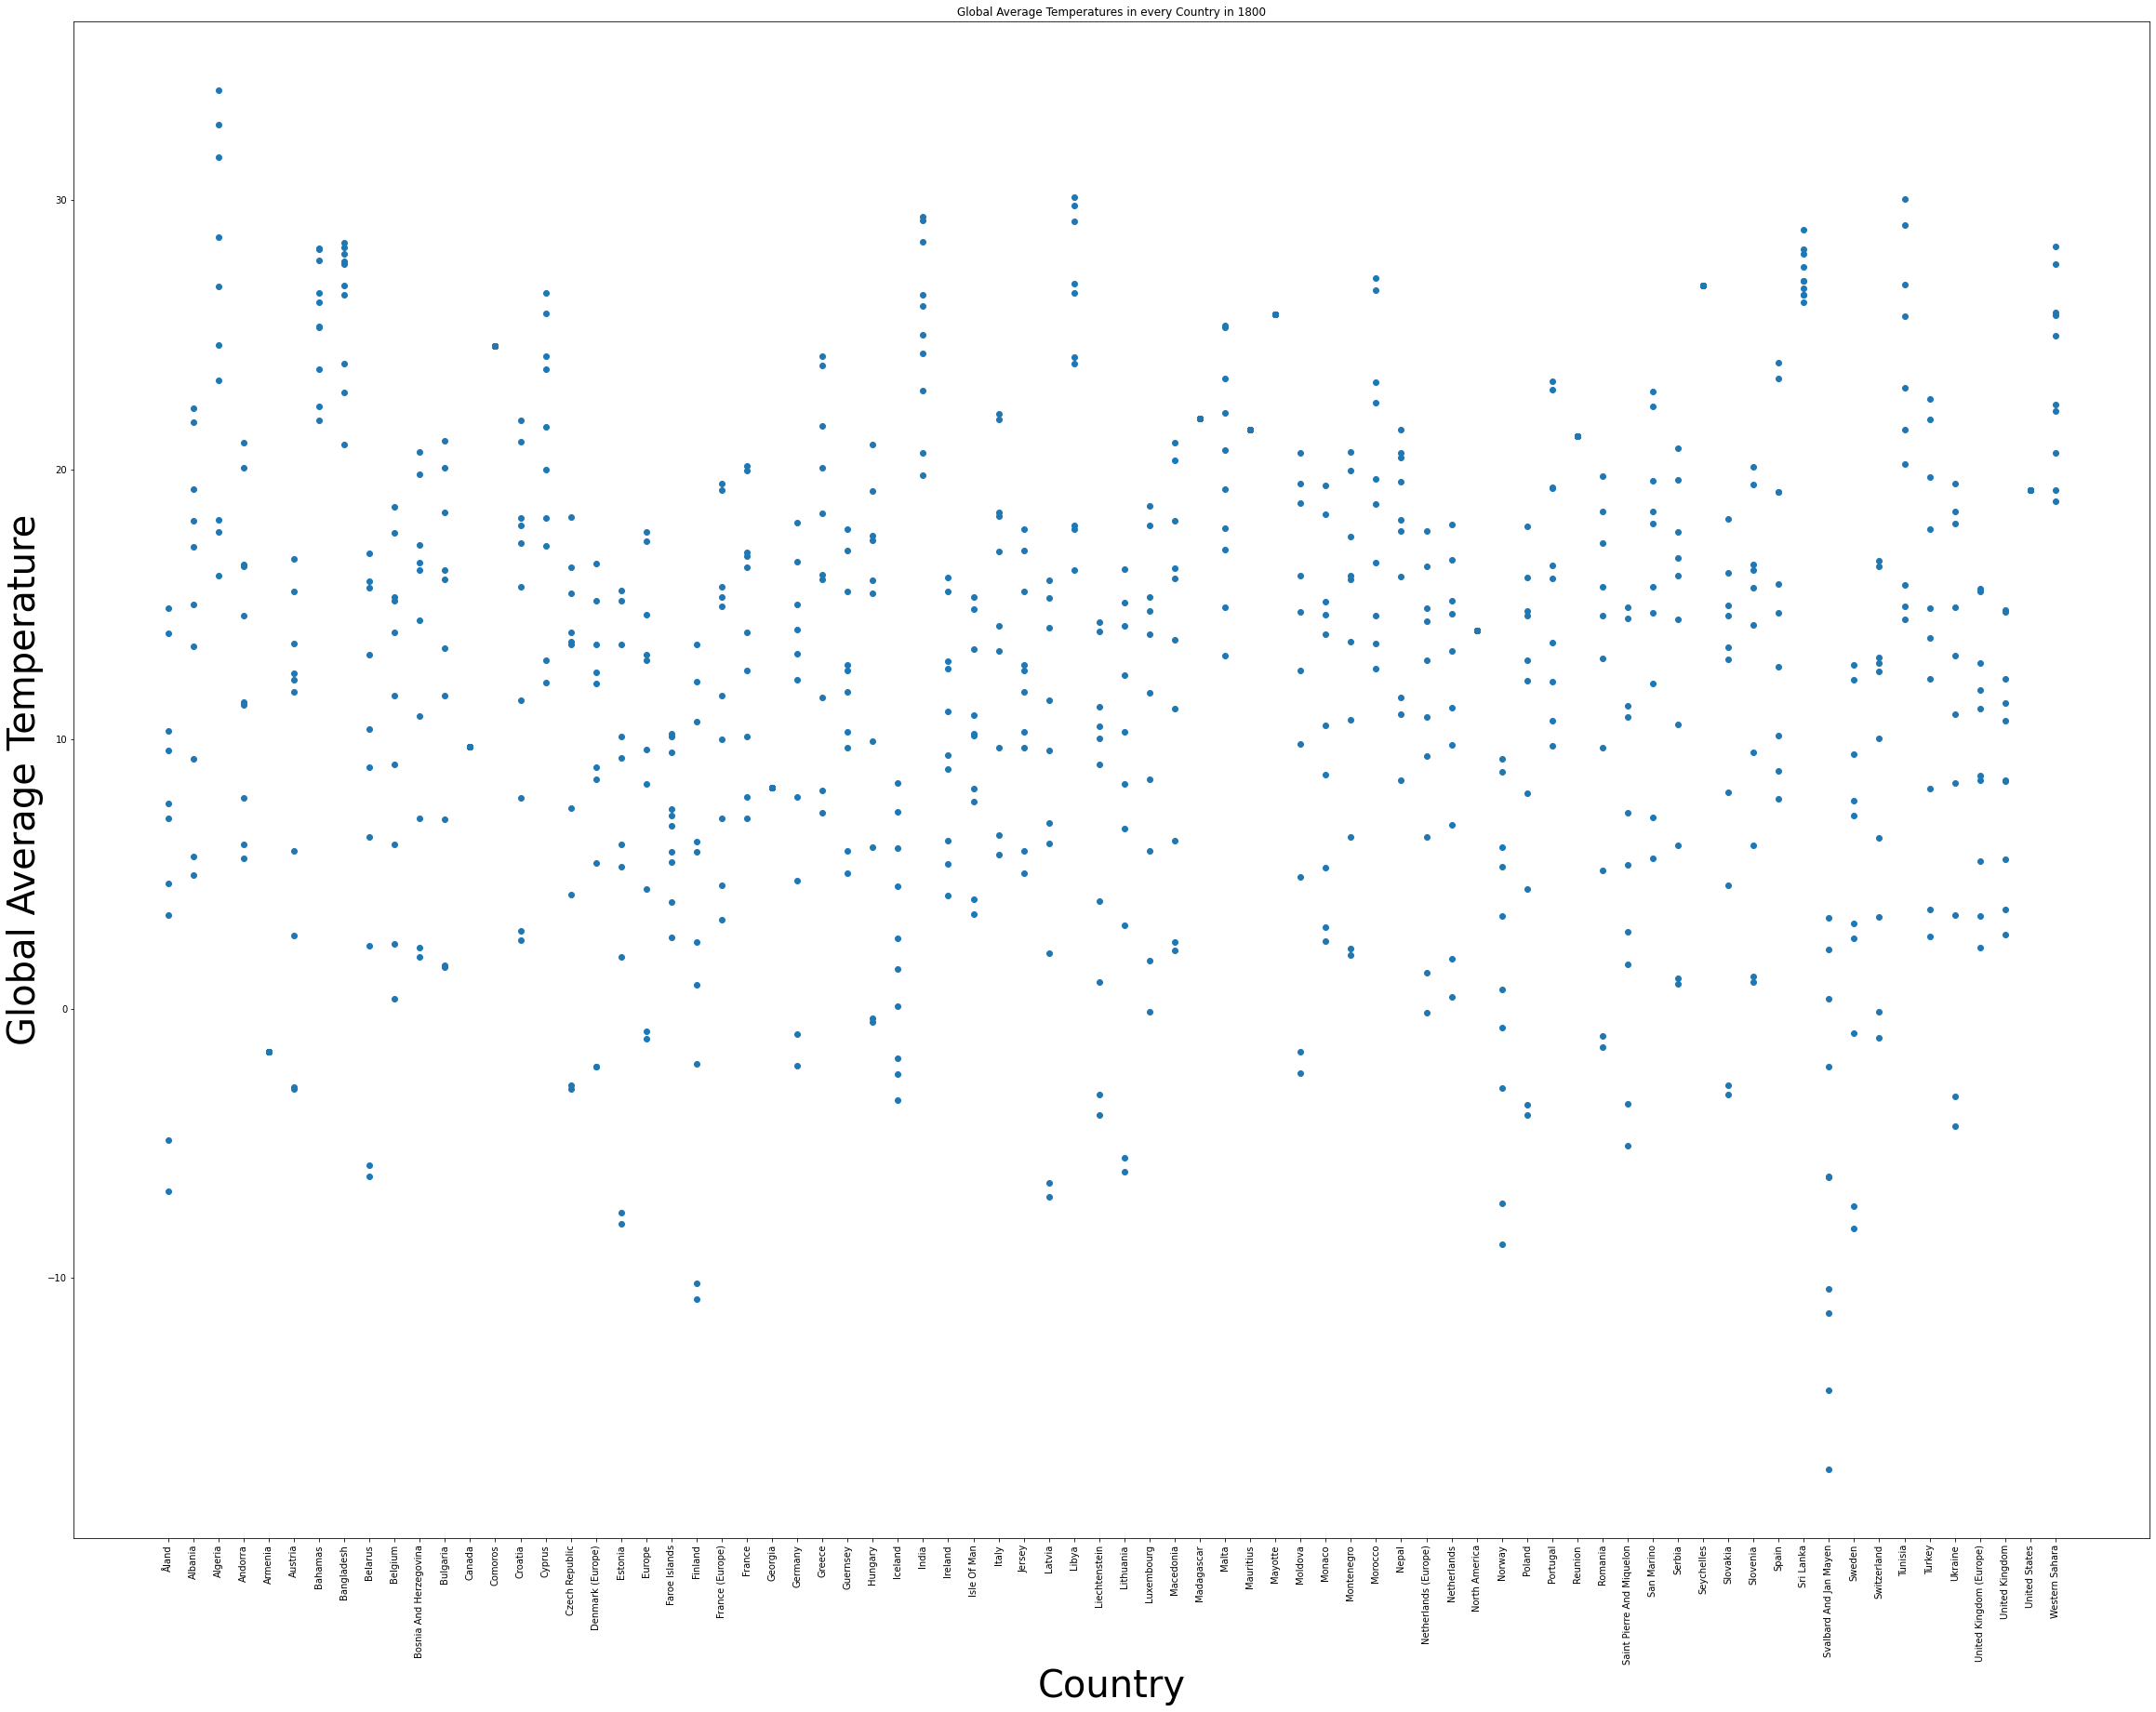

In [15]:
# Plotting a Scatter plot of Average Temperature Values against Countries in the Year 1800

fig, ax = plt.subplots(figsize=(40,30))
plt.scatter(year1800["Country"], year1800["AverageTemperature"])
plt.title('Global Average Temperatures in every Country in 1800')
plt.xlabel('Country', fontsize= 40)
plt.xticks(rotation = 90)
plt.ylabel('Global Average Temperature', fontsize= 40)
plt.show()

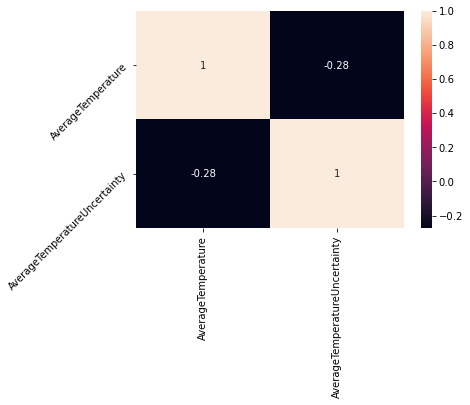

In [16]:
# Plotting the Correlation Matrix

corrMatrix = data.corr()
matrix = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

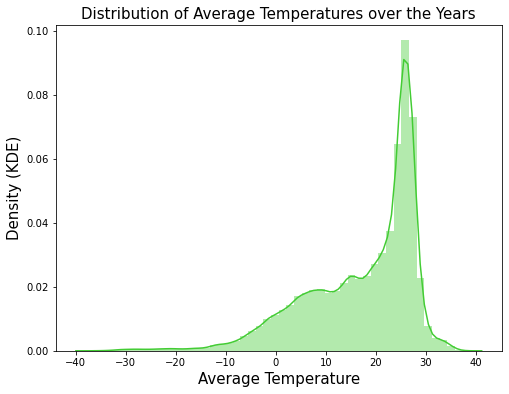

In [17]:
# Distribution plot of Average Temperatures 

fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data["AverageTemperature"], color="#43cc34",kde=True, ax=ax)
ax.set_title('Distribution of Average Temperatures over the Years', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Average Temperature", fontsize= 15)
plt.show()

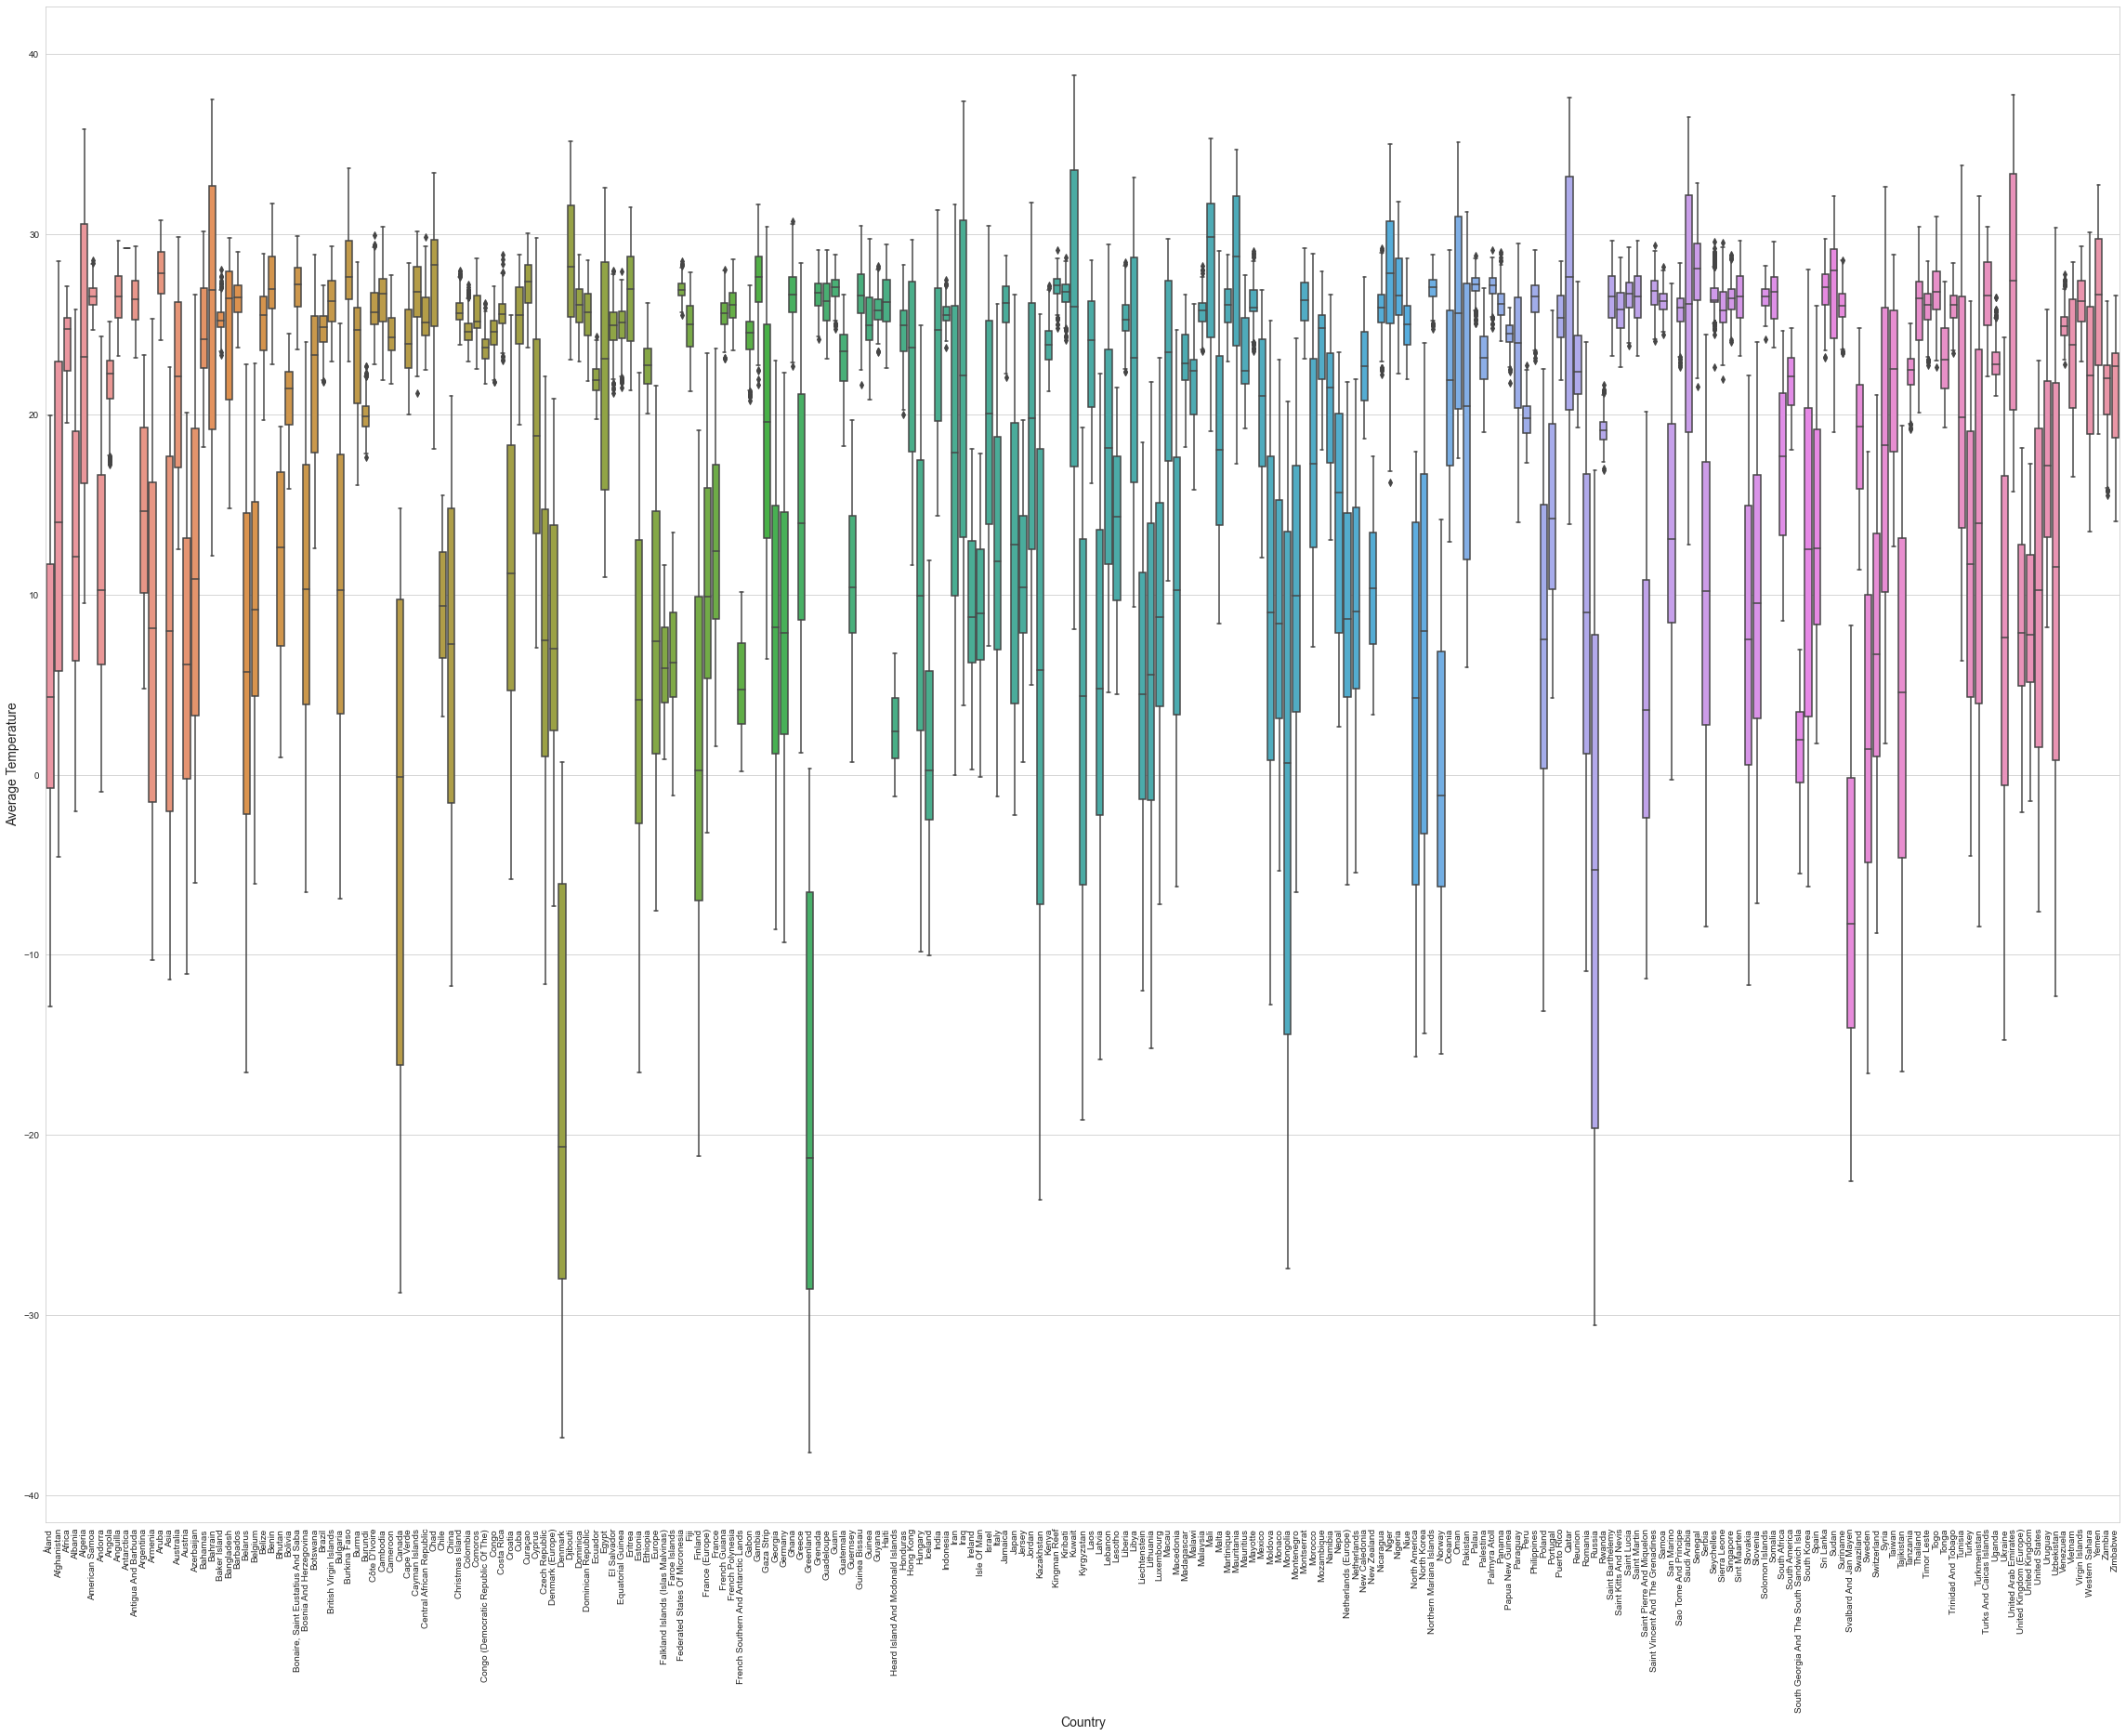

In [18]:
# Boxplot to see the distribution of Average Temperatures for each Country

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(40,30))
sns.boxplot(x="Country", y="AverageTemperature", data=data)
plt.xticks(rotation = 90)
ax.xaxis.set_label_text("Country",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Temperature",fontdict= {'size':14})
plt.show()

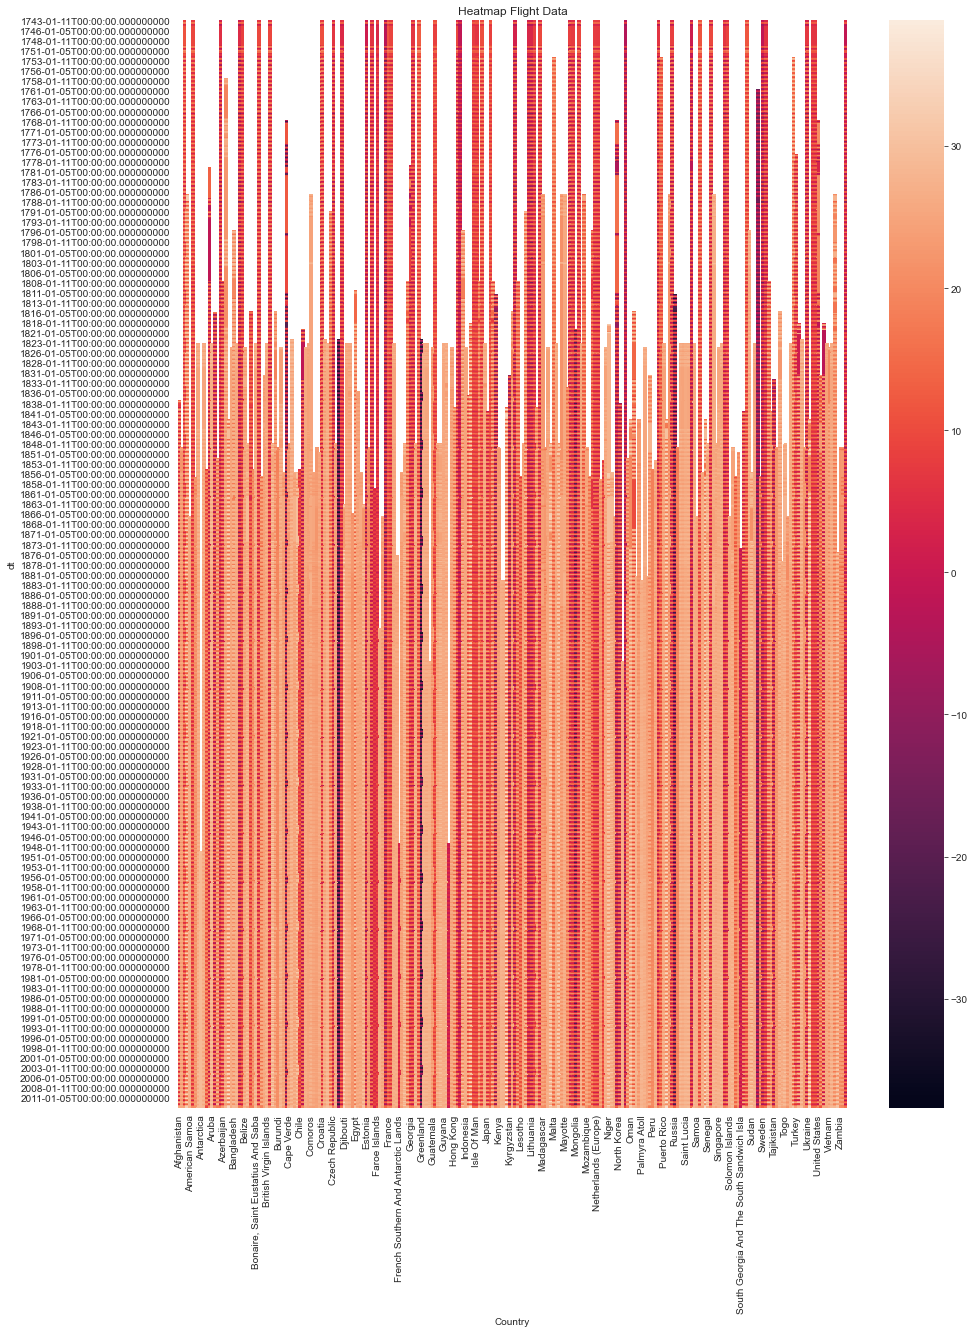

In [19]:
# Plotting a Heatmap of the average temperatures on all dates in every country

fig, ax = plt.subplots(figsize=(15,20))
compare = data.pivot("dt","Country", "AverageTemperature")
ax = sns.heatmap(compare)
plt.title("Heatmap Flight Data")
plt.show()

# The above Heatmap is too large and difficult to interpret. Lets break it down into something smaller, lets say into only the 1750s?

In [20]:
# Indexing the dataset on the date column

dataindexed = data.set_index("dt")
dataindexed

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-01-11,4.384,2.294,Åland
1743-01-12,4.384,2.294,Åland
1744-01-01,4.384,2.294,Åland
1744-01-02,4.384,2.294,Åland
1744-01-03,4.384,2.294,Åland
...,...,...,...
2013-01-05,19.059,1.022,Zimbabwe
2013-01-06,17.613,0.473,Zimbabwe
2013-01-07,17.000,0.453,Zimbabwe


In [21]:
# Subsetting the 1750s time period

year1750s = dataindexed.loc["1750-01-01":"1759-01-12"]
year1750s

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1750-01-01,1.091,1.119,Åland
1750-01-02,0.809,3.353,Åland
1750-01-03,0.923,4.716,Åland
1750-01-04,3.943,1.434,Åland
1750-01-05,6.265,1.339,Åland
...,...,...,...
1759-01-08,14.599,7.044,United Kingdom
1759-01-09,12.107,6.068,United Kingdom
1759-01-10,9.312,4.759,United Kingdom


In [22]:
#Resetting the Index to plot Heatmap

year1750 = year1750s.reset_index()
year1750

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1750-01-01,1.091,1.119,Åland
1,1750-01-02,0.809,3.353,Åland
2,1750-01-03,0.923,4.716,Åland
3,1750-01-04,3.943,1.434,Åland
4,1750-01-05,6.265,1.339,Åland
...,...,...,...,...
6269,1759-01-08,14.599,7.044,United Kingdom
6270,1759-01-09,12.107,6.068,United Kingdom
6271,1759-01-10,9.312,4.759,United Kingdom
6272,1759-01-11,3.959,6.256,United Kingdom


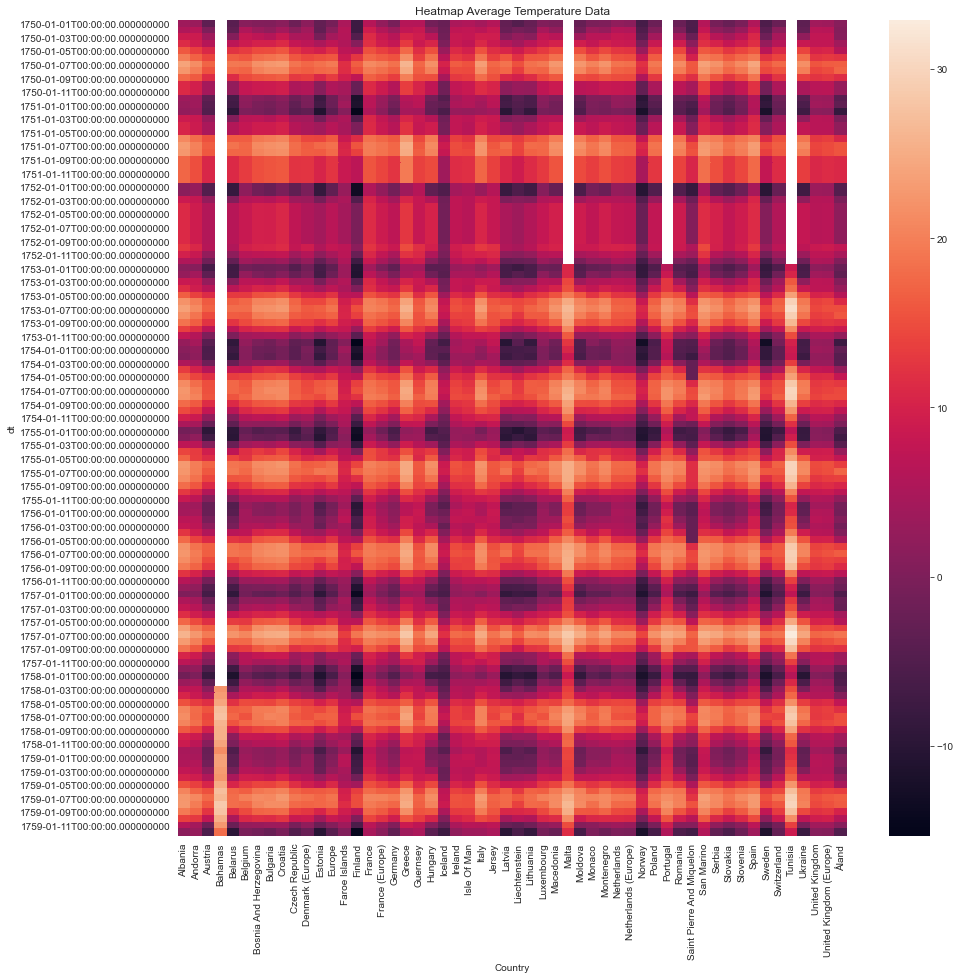

In [23]:
# Plotting Heatmap of the average temperature of every Country during the 1750s

fig, ax = plt.subplots(figsize=(15,15))
compare = year1750.pivot("dt", "Country", "AverageTemperature")
ax = sns.heatmap(compare)
plt.title("Heatmap Average Temperature Data")
plt.show()

In [24]:
# Pivoting the year1750 dataframe from a long view to wide view to attempt to understand it better

year1750p1 = pd.pivot_table(year1750, values='AverageTemperature', index="Country", columns="dt")
year1750p1

dt,1750-01-01,1750-01-02,1750-01-03,1750-01-04,1750-01-05,1750-01-06,1750-01-07,1750-01-08,1750-01-09,1750-01-10,...,1759-01-03,1759-01-04,1759-01-05,1759-01-06,1759-01-07,1759-01-08,1759-01-09,1759-01-10,1759-01-11,1759-01-12
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.600,5.551,8.859,11.391,15.964,19.712,23.893,22.359,17.771,11.089,...,7.485,9.986,15.347,20.499,22.485,22.689,19.421,13.823,6.024,1.566
Andorra,3.313,6.378,8.788,9.414,13.579,17.002,21.520,19.732,16.179,9.617,...,6.963,9.179,13.596,17.195,20.897,19.700,17.553,12.784,4.456,2.622
Austria,-3.582,0.001,3.849,6.304,10.947,14.214,17.247,15.382,11.434,4.288,...,1.846,5.740,10.511,15.208,17.668,15.894,12.470,7.556,-1.892,-5.582
Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.085,22.440,25.015,27.366,26.453,28.554,27.805,25.375,22.722,18.170
Belarus,-4.102,-3.338,0.737,6.940,12.209,16.544,19.282,17.795,11.324,2.502,...,-0.651,4.916,10.601,17.630,18.100,18.166,11.831,4.962,-2.232,-9.702
Belgium,1.171,5.490,8.131,8.928,13.186,15.904,19.100,17.114,14.794,7.873,...,6.133,9.208,12.741,16.686,19.909,17.718,14.681,11.037,2.590,-0.272
Bosnia And Herzegovina,0.529,3.260,7.270,10.097,14.680,18.161,21.887,20.148,15.620,8.676,...,5.636,9.007,14.169,19.048,21.249,20.563,17.122,11.675,3.095,-1.148
Bulgaria,0.340,2.016,6.040,9.921,14.926,18.744,22.664,21.153,16.076,8.842,...,4.799,8.241,14.019,19.604,20.939,21.516,17.563,11.342,3.488,-2.402
Croatia,1.300,4.344,8.367,11.114,15.816,19.390,23.000,21.097,16.544,9.427,...,6.613,10.186,15.363,20.304,22.697,21.540,17.960,12.538,3.626,-0.344


In [25]:
# Plotting the Average Temperature of Every Country over the entire 1750s and sorting the values

year1750p2 = pd.pivot_table(year1750, values='AverageTemperature', index="Country")
year1750p2s = year1750p2.sort_values("AverageTemperature", ascending = "True")
year1750p2s

,AverageTemperature
Country,
Norway,-0.238375
Finland,0.884275
Iceland,1.109775
Sweden,2.048758
Saint Pierre And Miquelon,3.596775
Liechtenstein,4.347092
Estonia,4.500817
Åland,4.879808
Latvia,5.030250


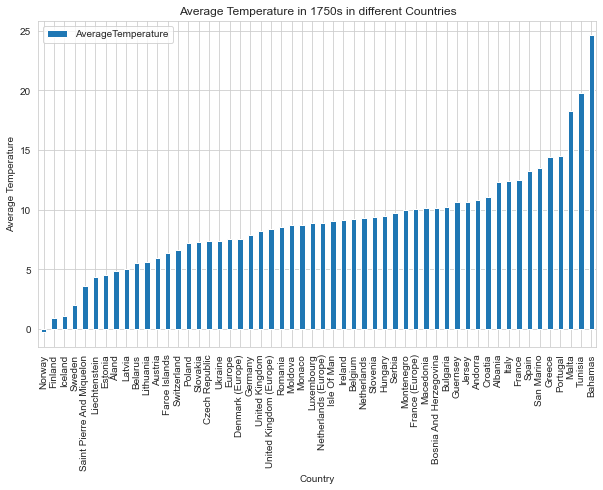

In [26]:
# Visualising which countries had the highest and lowest average temperatures in the 1750s


year1750p2s.plot(kind="bar", figsize = (10,6), title = "Average Temperature in 1750s in different Countries")
plt.xlabel("Country")
plt.ylabel("Average Temperature")
plt.show()

In [53]:
# Pivoting the main dataframe to get the mean of the average temperature uncertainty for each month

datap1 = pd.pivot_table(data, values='AverageTemperatureUncertainty', index="dt")
datap1

,AverageTemperatureUncertainty
dt,
1743-01-11,2.183520
1743-01-12,2.183520
1744-01-01,2.183520
1744-01-02,2.183520
1744-01-03,2.183520
...,...
2013-01-05,0.479667
2013-01-06,0.520650
2013-01-07,0.533728


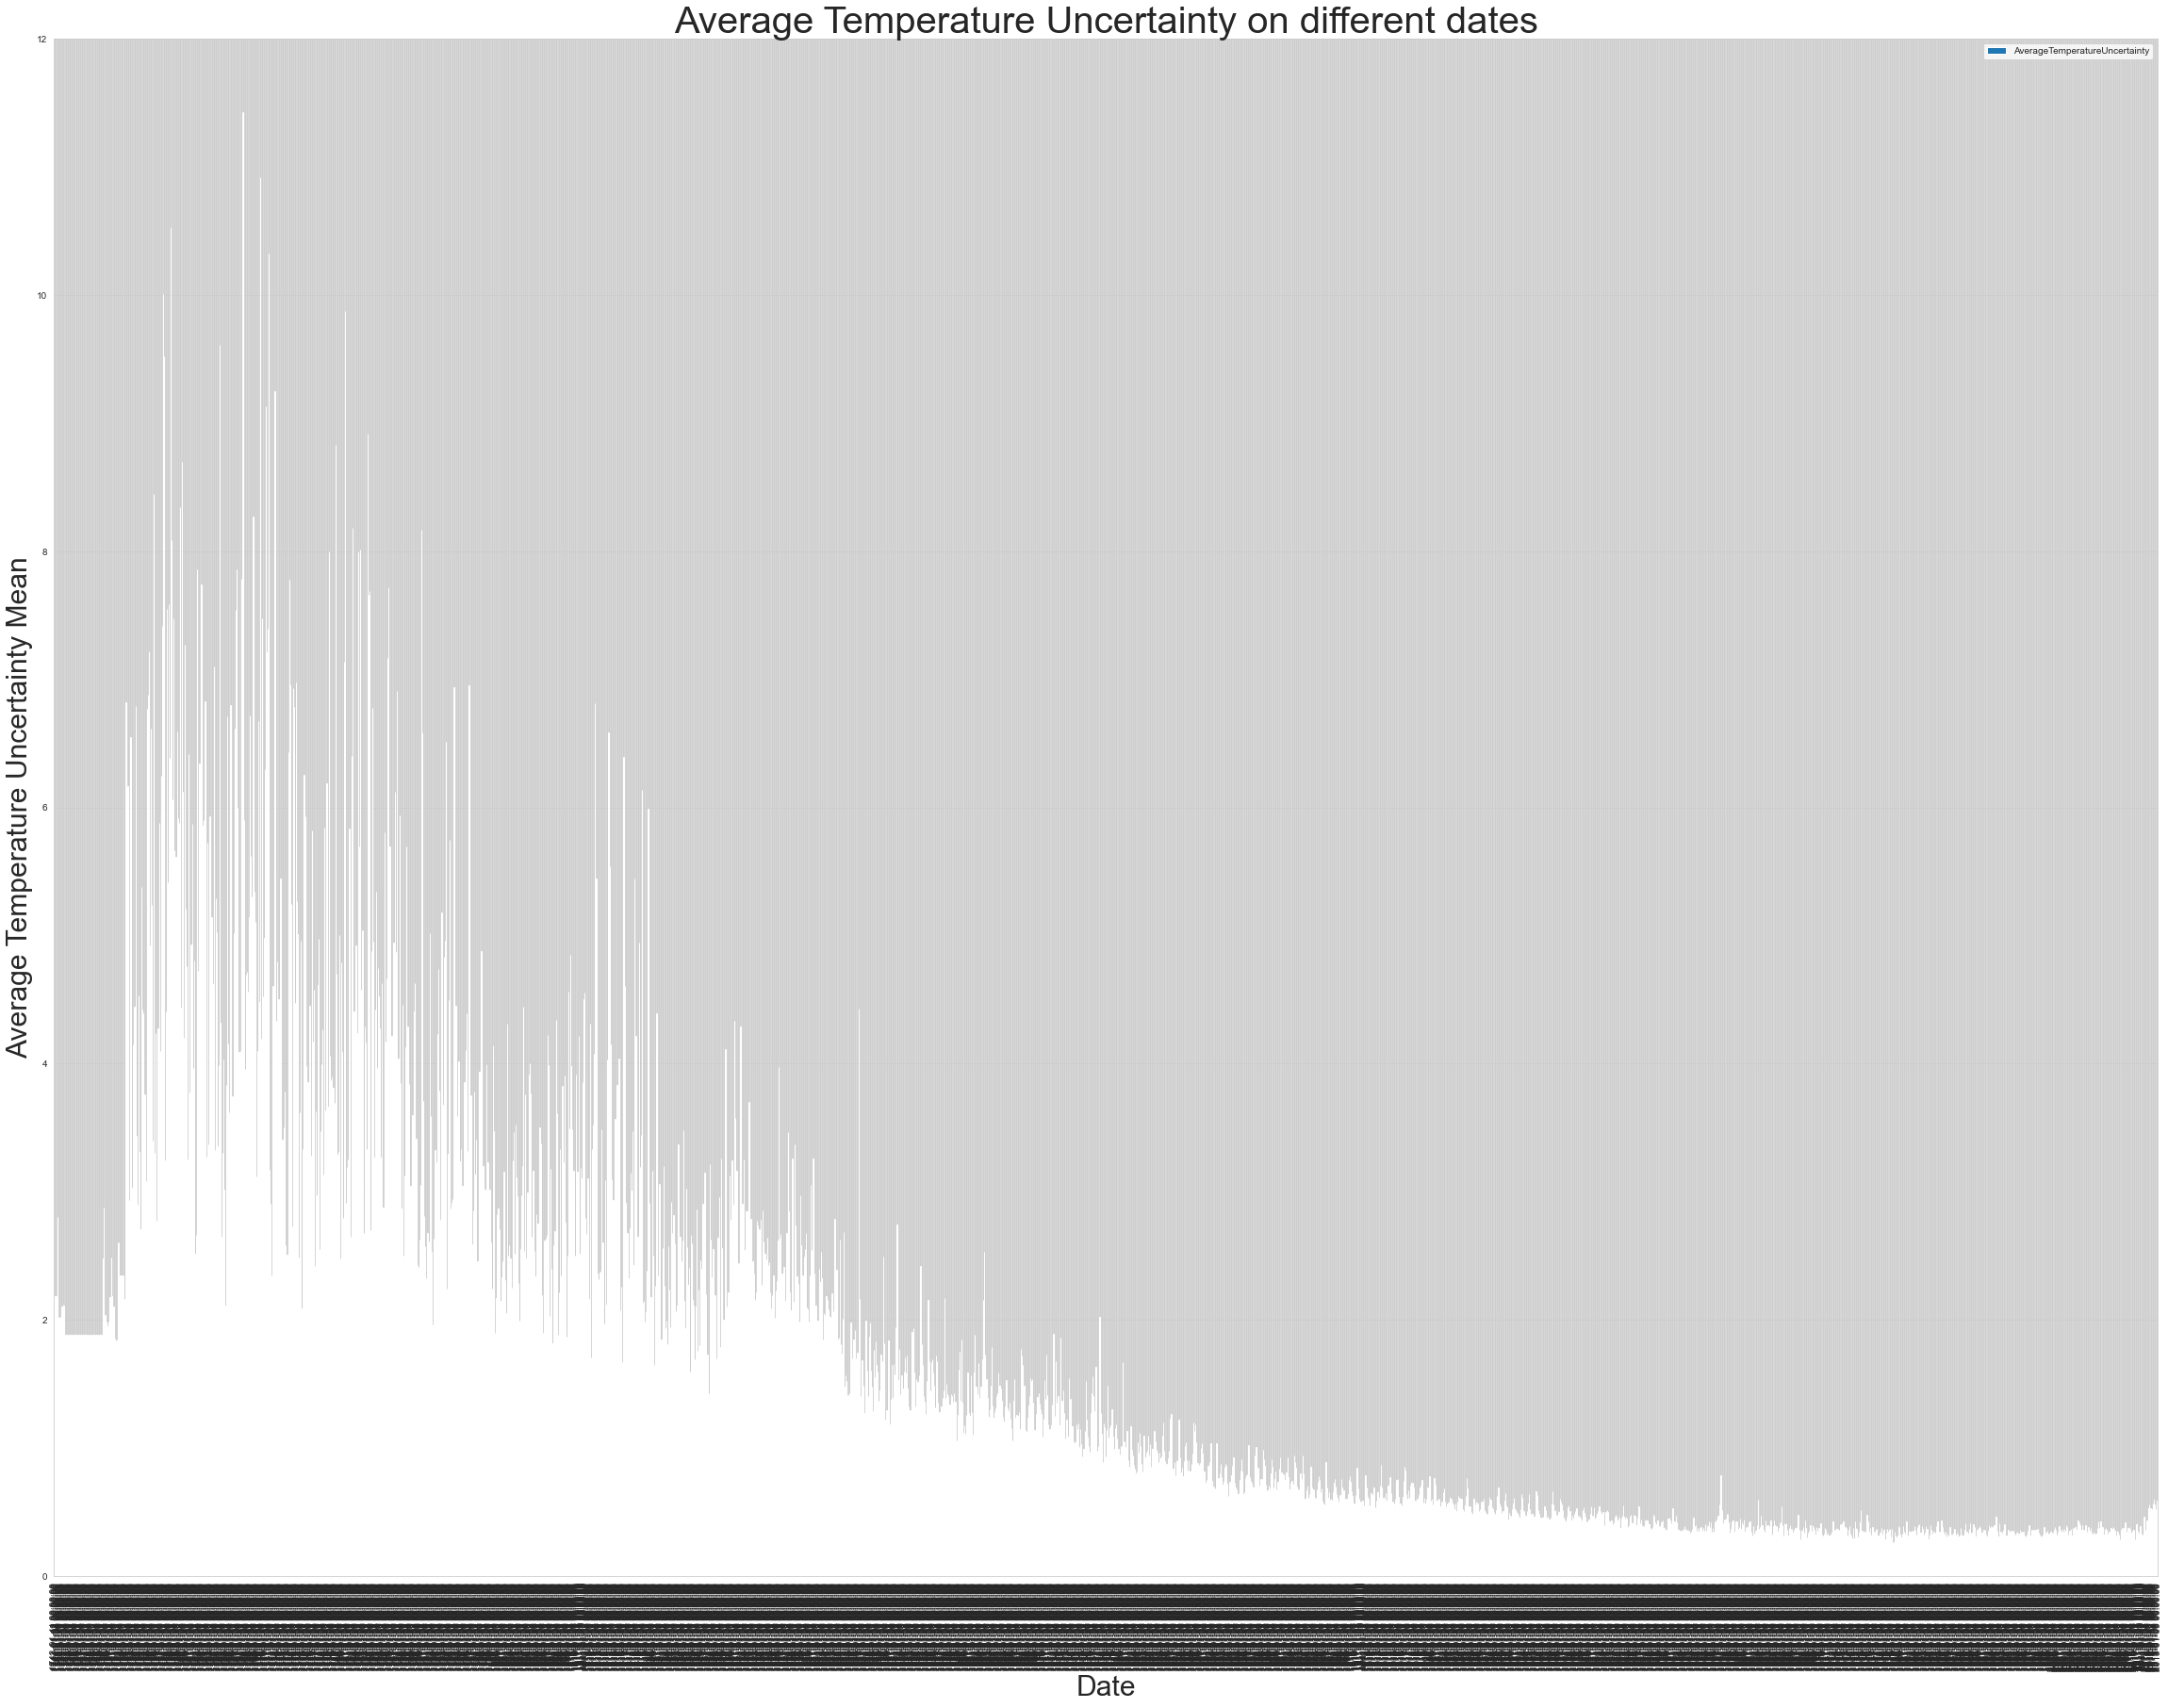

In [65]:
# Visualising which dates had the highest and lowest average temperatures uncertainties


datap1.plot(kind="bar", figsize = (40,30))
plt.xlabel("Date", fontsize = 30)
plt.ylabel("Average Temperature Uncertainty Mean", fontsize = 30)
plt.title("Average Temperature Uncertainty on different dates", fontsize = 40)
plt.show()

# As time goes on and scientific developments allow us to calculate and record the temperatures more accurately, the average temperature uncertainty shows a gradual decreasing trend

In [52]:
# Pivoting the main dataframe to get the mean of the average temperature uncertainty for each country

datap2 = pd.pivot_table(data, values='AverageTemperatureUncertainty', index="Country")
datap2

,AverageTemperatureUncertainty
Country,
Afghanistan,0.946040
Africa,0.425837
Albania,1.538406
Algeria,1.191746
American Samoa,0.565521
...,...
Western Sahara,1.245503
Yemen,0.870704
Zambia,0.679616


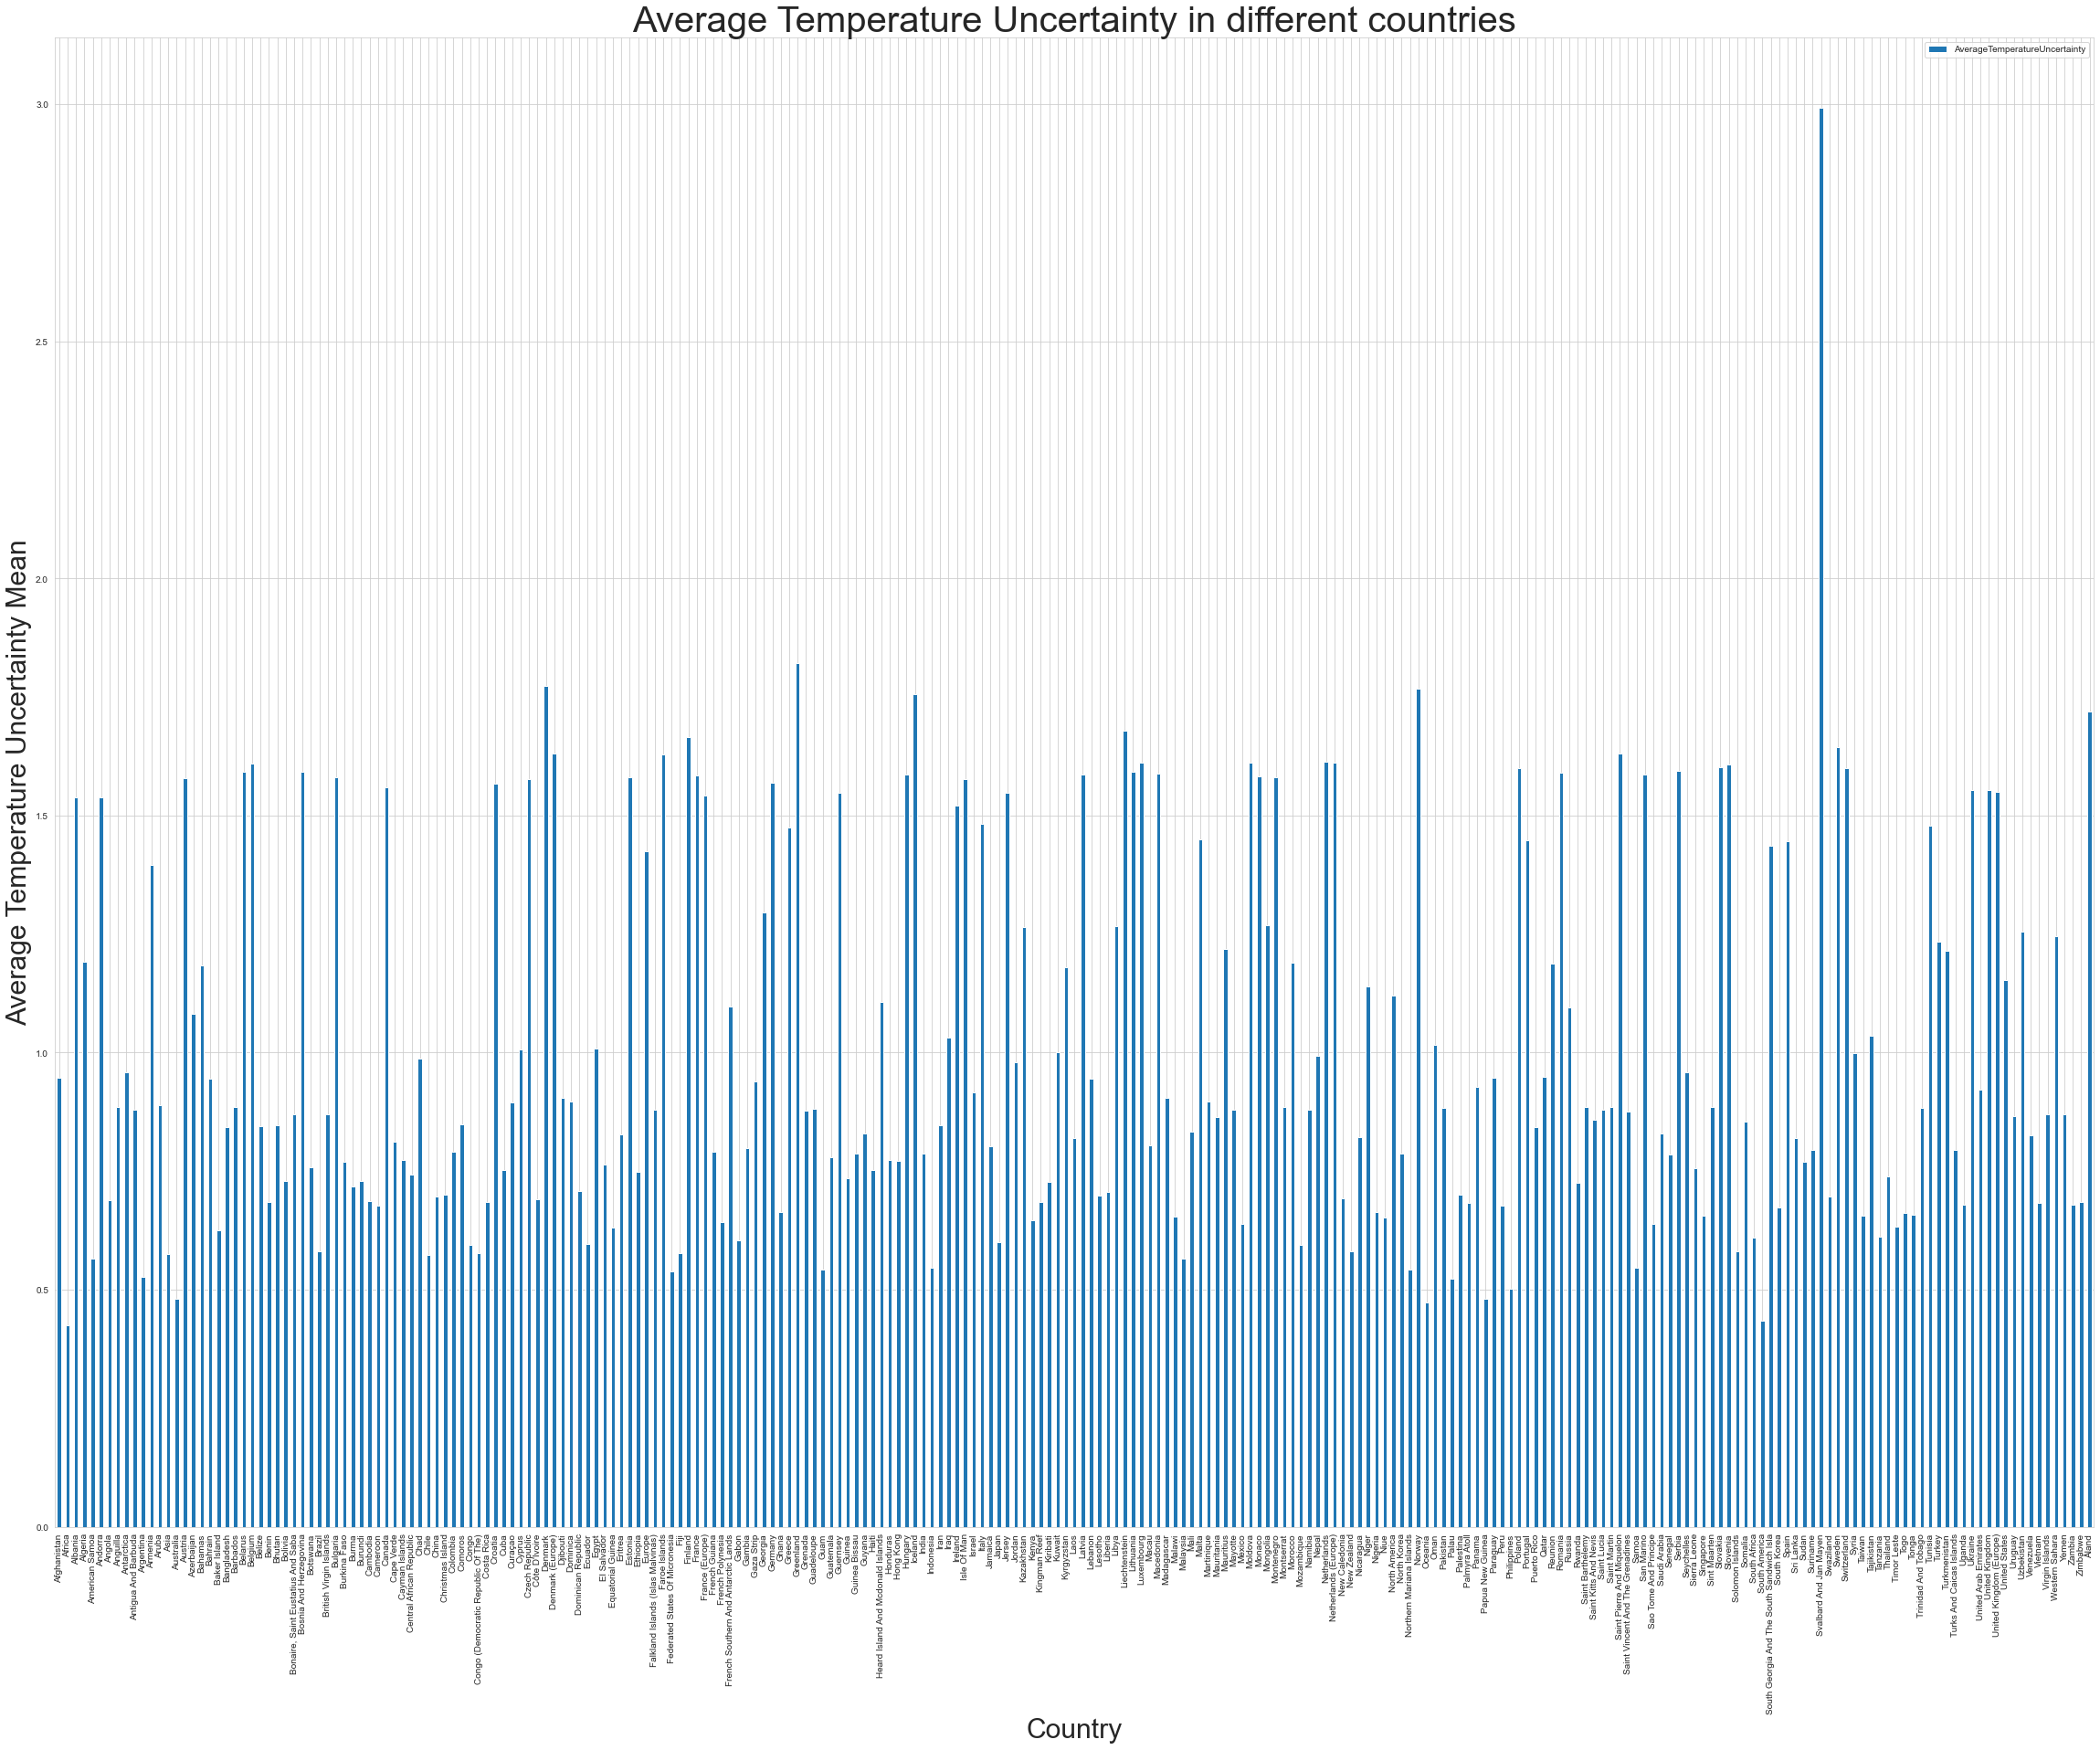

In [64]:
# Visualising which countries had the highest and lowest average temperatures uncertainties


datap2.plot(kind="bar", figsize = (40,30))
plt.title("Average Temperature Uncertainty in different countries", fontsize = 40)
plt.xlabel("Country", fontsize = 30)
plt.ylabel("Average Temperature Uncertainty Mean", fontsize = 30)
plt.show()

   # The End! :)
   # Made by: Ronit Choudhury
   # https://github.com/ronitch